<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carolina Barba Anaya e Iván Andrés Arellano Ruelas.

**Fecha:** 27 de Noviembre del 2021.

**Expediente** : if720071 y .
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Carolina1002/ProyectoConjunto_CBarba_CLobera.git

# Tarea 10: Clase 24

Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación Europea. Como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método ya sea `down-and-out` o `Up-and-out` defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada.

Se habilitará un enlace en canvas para subir un cuaderno de python, con la solución.

**Criterio de revisión.**

> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

#### SOLUCION CAROLINA

In [1]:
#Librerias
import numpy as np
import pandas as pd
import scipy.stats as st
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_datareader.data as web
%matplotlib inline

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date = None, end_date = None):
    closes = web.DataReader(name = tickers, data_source = "yahoo", start = start_date, end = end_date)
    closes = closes["Adj Close"]
    closes.sort_index(inplace = True)
    return closes

In [3]:
# Función que calcula el rendimiento logarítmico diario
def calc_daily_ret(closes):
    return np.log(closes / closes.shift(1)).dropna()

In [4]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_msft = closes.loc[:,'MSFT']
closes_msft

Date
2017-01-03     58.185520
2017-01-04     57.925179
2017-01-05     57.925179
2017-01-06     58.427258
2017-01-09     58.241310
                 ...    
2021-11-19    343.109985
2021-11-22    339.829987
2021-11-23    337.679993
2021-11-24    337.910004
2021-11-26    329.679993
Name: MSFT, Length: 1235, dtype: float64

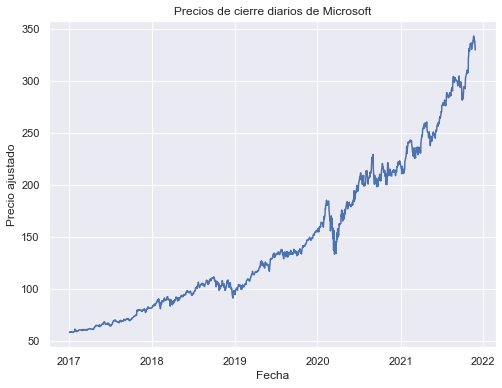

In [5]:
closes = get_adj_closes(["MSFT"], "2017-01-01") # inicia el primer día del año 2017
closes_msft = closes.loc[:, "MSFT"] 
ret_msft = calc_daily_ret(closes_msft)
plt.figure(figsize = [8, 6]) 
plt.plot(closes_msft)
plt.title("Precios de cierre diarios de Microsoft")
plt.xlabel("Fecha")
plt.ylabel("Precio ajustado")
plt.show()

## Valuación de opción Call

In [6]:
import requests

def obtener_datos_opciones(symbol):
    headers = headers = {
            'Connection': 'keep-alive',
            'Expires': str(-1),
            'Upgrade-Insecure-Requests': str(1),
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36'
    }
    url = f'https://query1.finance.yahoo.com/v7/finance/options/{symbol}'
    r = requests.get(url, headers=headers)
    dates = r.json()['optionChain']['result'][0]['expirationDates']
    
    calls = []
    puts = []
    
    for d in dates:
        res = requests.get(url + f'?date={d}', headers=headers)
        calls += res.json()['optionChain']['result'][0]['options'][0]['calls']
        puts += res.json()['optionChain']['result'][0]['options'][0]['puts']

    for c in calls:
        c['type'] = 'call'
        c['lastTradeDate'] = pd.to_datetime(c['lastTradeDate']*1000000000)
        c['expiration'] = pd.to_datetime(c['expiration']*1000000000)
    for p in puts:
        p['type'] = 'put'
        p['lastTradeDate'] = pd.to_datetime(p['lastTradeDate']*1000000000)
        p['expiration'] = pd.to_datetime(p['expiration']*1000000000)
    
    return pd.DataFrame(calls + puts)

In [7]:
opciones_msft = obtener_datos_opciones('MSFT')
opciones_msft


,contractSymbol,strike,currency,lastPrice,change,percentChange,volume,openInterest,bid,ask,contractSize,expiration,lastTradeDate,impliedVolatility,inTheMoney,type
0,MSFT211203C00225000,225.0,USD,105.14,0.000000,0.000000,8.0,7.0,103.3,106.80,REGULAR,2021-12-03,2021-10-29 18:39:47,1.342777,True,call
1,MSFT211203C00230000,230.0,USD,110.75,0.000000,0.000000,NaN,4.0,98.3,101.80,REGULAR,2021-12-03,2021-11-17 16:18:26,1.274418,True,call
2,MSFT211203C00235000,235.0,USD,100.55,0.000000,0.000000,3.0,5.0,93.3,96.80,REGULAR,2021-12-03,2021-11-24 16:10:58,1.208012,True,call
3,MSFT211203C00240000,240.0,USD,91.45,-8.900002,-8.868960,5.0,9.0,88.3,91.80,REGULAR,2021-12-03,2021-11-26 17:18:56,1.142582,True,call
4,MSFT211203C00245000,245.0,USD,86.35,-4.200005,-4.638326,5.0,17.0,83.3,86.85,REGULAR,2021-12-03,2021-11-26 17:18:53,1.088872,True,call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,MSFT240119P00450000,450.0,USD,134.80,9.540001,7.616159,4.0,429.0,133.0,137.50,REGULAR,2024-01-19,2021-11-26 17:52:00,0.261940,True,put
1862,MSFT240119P00460000,460.0,USD,134.00,0.000000,0.000000,1.0,1.0,141.5,146.00,REGULAR,2024-01-19,2021-11-18 15:52:34,0.262047,True,put
1863,MSFT240119P00470000,470.0,USD,147.05,0.000000,0.000000,NaN,1.0,150.0,154.50,REGULAR,2024-01-19,2021-11-03 13:44:50,0.261284,True,put
1864,MSFT240119P00480000,480.0,USD,160.50,0.000000,0.000000,1.0,4.0,158.5,163.00,REGULAR,2024-01-19,2021-11-01 15:33:14,0.259605,True,put


In [8]:
indice_opt = opciones_msft.loc[(opciones_msft.type == "call") & (opciones_msft.expiration == "2024-01-19")].set_index("expiration")
indice_opt 

,contractSymbol,strike,currency,lastPrice,change,percentChange,volume,openInterest,bid,ask,contractSize,lastTradeDate,impliedVolatility,inTheMoney,type
expiration,,,,,,,,,,,,,,,
2024-01-19,MSFT240119C00145000,145.0,USD,188.00,-6.00,-3.092783,2.0,85.0,186.5,191.0,REGULAR,2021-11-24 19:12:09,0.435247,True,call
2024-01-19,MSFT240119C00150000,150.0,USD,196.75,0.00,0.000000,2.0,137.0,182.0,186.5,REGULAR,2021-11-22 17:17:38,0.428839,True,call
2024-01-19,MSFT240119C00155000,155.0,USD,183.89,0.00,0.000000,4.0,16.0,177.5,182.0,REGULAR,2021-11-15 14:32:36,0.422155,True,call
2024-01-19,MSFT240119C00160000,160.0,USD,179.40,0.00,0.000000,1.0,114.0,173.0,177.5,REGULAR,2021-11-23 15:43:44,0.415259,True,call
2024-01-19,MSFT240119C00165000,165.0,USD,183.00,0.00,0.000000,1.0,422.0,168.5,173.5,REGULAR,2021-11-19 19:47:34,0.415564,True,call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,MSFT240119C00460000,460.0,USD,19.19,0.00,0.000000,56.0,334.0,18.0,21.0,REGULAR,2021-11-24 16:38:38,0.294746,False,call
2024-01-19,MSFT240119C00470000,470.0,USD,17.50,1.00,6.060606,3.0,207.0,13.5,18.5,REGULAR,2021-11-26 17:39:45,0.288841,False,call
2024-01-19,MSFT240119C00480000,480.0,USD,15.26,0.77,5.314013,1.0,498.0,14.0,17.5,REGULAR,2021-11-26 14:41:06,0.291534,False,call


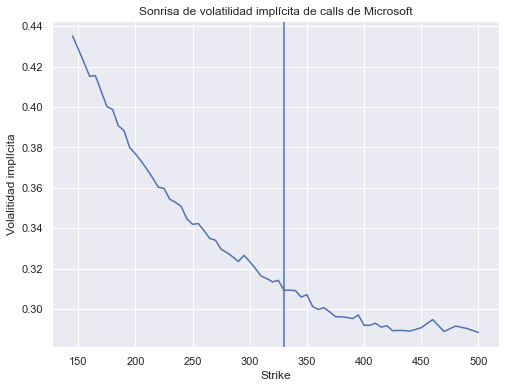

In [9]:
plt.figure(figsize = [8, 6]) # gráfica de sonrisa de volatilidad implícita
plt.plot(indice_opt.set_index("strike").loc[:, "impliedVolatility"])
plt.title("Sonrisa de volatilidad implícita de calls de Microsoft")
plt.xlabel("Strike")
plt.ylabel("Volalitidad implícita")
plt.axvline(closes_msft.iloc[-1]) #329.67
plt.show()

In [10]:
print("El precio del activo el dia de hoy es de " + str(closes_msft.iloc[-1]) + ".") 

El precio del activo el dia de hoy es de 329.67999267578125.


In [11]:
opt_deseada = opciones_msft.loc[(opciones_msft.type == "call") & (opciones_msft.strike == 375) & (opciones_msft.expiration == "2024-01-19")]
opt_deseada # defino mi strike de 375, debe ser más alto que el spot price

,contractSymbol,strike,currency,lastPrice,change,percentChange,volume,openInterest,bid,ask,contractSize,expiration,lastTradeDate,impliedVolatility,inTheMoney,type
972,MSFT240119C00375000,375.0,USD,39.48,-1.170002,-2.878234,2.0,360.0,37.45,40.5,REGULAR,2024-01-19,2021-11-26 16:40:55,0.296157,False,call


### Simulación con modelo de rendimientos normales

Se realiza una comparaciónde una call europea y una call barrera con el modelo de rendimientos normales.

La tasa libre de riesgo necesaria para valuar la opción se tomó del bono del tesoro de E. U. A. a dos año.

Se definió una barrera de 300 ya que se sabe que esta debe ser menor al spot price.

In [12]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
mu = ret_msft.mean() 
sigma = ret_msft.std() 
r = 0.005 / 360 
today = pd.Timestamp(date.today()) 
expiry = opt_valuar.expiration
dates = pd.date_range(start = today, end = expiry, freq = "B") 
ndays = len(dates) 
nscen = 100000 
K = opt_valuar.strike
S0 = closes_msft.iloc[-1] 
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays, nscen) + r, index = dates) 
sim_closes = S0 * np.exp(sim_ret.cumsum()) 
strike = K 
call = pd.DataFrame({"Prima europea": np.exp(-r * ndays) * np.fmax(sim_closes - strike, 0).mean(axis = 1)}, index = dates)
pd.set_option("display.max_columns", 15)
B = 300
I = (sim_closes > B).cumprod(axis = 0) > 0 
calldo_norm = pd.DataFrame({"Prima down-and-out": np.exp(-r * ndays) * (I * np.fmax(sim_closes - strike, 
                                                                                    0)).mean(axis = 1)}, index = dates) 

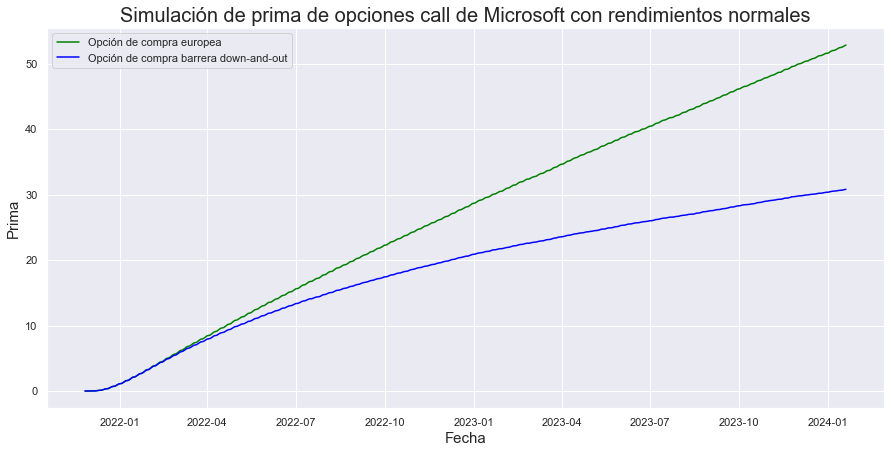

In [13]:
plt.figure(figsize = [15, 7]) # gráfica de simulación con rendimientos normales de call europea y down and out
plt.plot(call, color = "green", label = "Opción de compra europea")
plt.plot(calldo_norm, color = "blue", label = "Opción de compra barrera down-and-out")
plt.title("Simulación de prima de opciones call de Microsoft con rendimientos normales", fontsize = 20)
plt.xlabel("Fecha", fontsize = 15)
plt.ylabel("Prima", fontsize = 15)
plt.legend(loc = "best")
plt.show()

In [14]:
print("El precio real de la prima del call de Microsot es " + str(opt_valuar["lastPrice"]) + ".") 

El precio real de la prima del call de Microsot es 39.48.


**Valuación europea**

In [15]:
call.iloc[-1] # valuación de la prima de call europea en el último día

Prima europea    52.814239
Name: 2024-01-19 00:00:00, dtype: float64

In [16]:
confianza = 0.95 #
sigma_est = sim_closes.iloc[-1].sem() 
mean_est = call.iloc[-1]["Prima europea"] 
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del call europeo de Microsoft con el modelo de los rendimientos normales" +
      " es " + str(i) + ".")

El intervalo de confianza de la valuación del call europeo de Microsoft con el modelo de los rendimientos normales es (51.85412416199797, 53.77435430275405).


El intervalo de confianza de la valuación de la prima europea esta cerca a la prima real, por lo que la simulación con el modelo de rendimientos normales es confiable.

**Valuación barrera**

In [17]:
calldo_norm.iloc[-1] # valuación de la prima de call barrera en el último día

Prima down-and-out    30.788647
Name: 2024-01-19 00:00:00, dtype: float64

In [18]:
mean_est = calldo_norm.iloc[-1]["Prima down-and-out"] 
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) 
print("El intervalo de confianza de la valuación del call down-and-out de Microsoft con el modelo de los rendimientos" +
      " normales es " + str(i) + ".")

El intervalo de confianza de la valuación del call down-and-out de Microsoft con el modelo de los rendimientos normales es (29.828532390209094, 31.748762530965177).


El invervalo de confianza de la valuación de la prima barrera con el modelo de rendimientos normales se acerca aún más a la prima real que la europea. Tiene sentido que la prima del call down-and-out dé más baja debido a que el riesgo con ese tipo de opciones siempre es un poco mayor (si la barrera es más alta hay más probabilidad de que la opción se desactive, el riesgo sea mayor y la prima más barata)

### Simulación con histograma de rendimientos

In [19]:
freq, values = np.histogram(ret_msft - mu + r, bins = 10000) 
prob = freq / np.sum(freq)
ret = np.random.choice(values[1:], (ndays, nscen), p = prob)
sim_ret_hist = pd.DataFrame(ret, index = dates) 
sim_closes_hist = S0 * np.exp(sim_ret_hist.cumsum()) 
strike = pd.DataFrame(K * np.ones([ndays, nscen]), index = dates) 
call_hist = pd.DataFrame({"Prima europea": np.exp(-r * ndays) * np.fmax(sim_closes_hist - strike, 
                                                                        np.zeros([ndays, nscen])).T.mean()}, index = dates)
calldo_hist = pd.DataFrame({"Prima down-and-out": np.exp(-r * ndays) * (I * np.fmax(sim_closes_hist - strike, 
                                                                                    0)).mean(axis = 1)}, index = dates) 

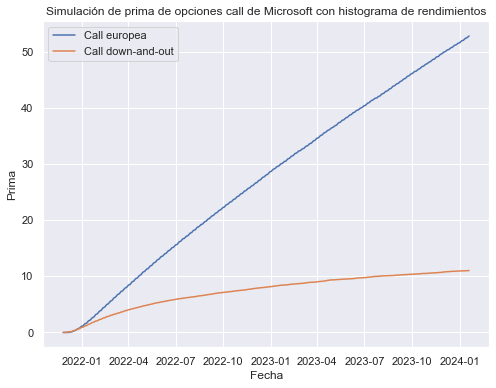

In [20]:
plt.figure(figsize = [8, 6]) 
plt.plot(call, label = "Call europea")
plt.plot(calldo_hist, label = "Call down-and-out")
plt.title("Simulación de prima de opciones call de Microsoft con histograma de rendimientos")
plt.xlabel("Fecha")
plt.ylabel("Prima")
plt.legend(loc = "best")
plt.show()

**Valuación europea**

In [21]:
call_hist.iloc[-1] # valuación de la prima de call europea en el último día (al cierre del contrato)

Prima europea    54.537819
Name: 2024-01-19 00:00:00, dtype: float64

In [22]:
sigma_est = sim_closes_hist.iloc[-1].sem() 
mean_est = call_hist.iloc[-1]["Prima europea"] 
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) 
print("El intervalo de confianza de la valuación del call europeo de Microsoft con el modelo del histograma de los" +
      " rendimientos es " + str(i) + ".")

El intervalo de confianza de la valuación del call europeo de Microsoft con el modelo del histograma de los rendimientos es (53.56950850925494, 55.506129080428956).


El intervalo de confianza de la valuación de la prima europea da cerca a la prima real, por lo que la simulación con el histograma de los rendimientos también es confiable (un poco menos que la valuación con el modelo de rendimientos normales).

**Valuación barrera**

In [23]:
calldo_hist.iloc[-1] # valuación de la prima de call barrera en el último día (al cierre del contrato)

Prima down-and-out    11.026959
Name: 2024-01-19 00:00:00, dtype: float64

In [24]:
mean_est = calldo_hist.iloc[-1]["Prima down-and-out"] 
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est)
print("El intervalo de confianza de la valuación del call down-and-out de Microsoft con el modelo del histograma de los" +
      " rendimientos es " + str(i) + ".")

El intervalo de confianza de la valuación del call down-and-out de Microsoft con el modelo del histograma de los rendimientos es (10.058648906697789, 11.99526947787181).


La valuación con el histograma de los rendimientos de la call barrera es menor a la valuación real de la opción.

## Valuación de opción Put

In [25]:
indice_opt = opciones_msft.loc[(opciones_msft.type == "put") & (opciones_msft.expiration == "2024-01-19")].set_index("expiration")
indice_opt 

,contractSymbol,strike,currency,lastPrice,change,percentChange,volume,openInterest,bid,ask,contractSize,lastTradeDate,impliedVolatility,inTheMoney,type
expiration,,,,,,,,,,,,,,,
2024-01-19,MSFT240119P00145000,145.0,USD,3.53,0.520000,17.275747,1494.0,2096.0,2.4,4.00,REGULAR,2021-11-26 17:53:21,0.387793,False,put
2024-01-19,MSFT240119P00150000,150.0,USD,4.08,0.000000,0.000000,130.0,167.0,2.4,5.45,REGULAR,2021-11-24 14:52:50,0.404028,False,put
2024-01-19,MSFT240119P00155000,155.0,USD,4.02,0.000000,0.000000,2.0,224.0,2.5,5.50,REGULAR,2021-11-22 18:00:48,0.390570,False,put
2024-01-19,MSFT240119P00160000,160.0,USD,4.80,0.000000,0.000000,1.0,42.0,3.0,8.00,REGULAR,2021-11-24 14:57:42,0.418615,False,put
2024-01-19,MSFT240119P00165000,165.0,USD,5.00,0.000000,0.000000,1.0,289.0,3.5,8.50,REGULAR,2021-11-19 18:59:25,0.411383,False,put
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,MSFT240119P00450000,450.0,USD,134.80,9.540001,7.616159,4.0,429.0,133.0,137.50,REGULAR,2021-11-26 17:52:00,0.261940,True,put
2024-01-19,MSFT240119P00460000,460.0,USD,134.00,0.000000,0.000000,1.0,1.0,141.5,146.00,REGULAR,2021-11-18 15:52:34,0.262047,True,put
2024-01-19,MSFT240119P00470000,470.0,USD,147.05,0.000000,0.000000,NaN,1.0,150.0,154.50,REGULAR,2021-11-03 13:44:50,0.261284,True,put


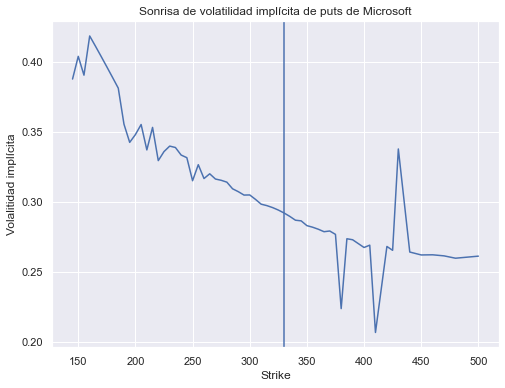

In [26]:
plt.figure(figsize = [8, 6]) # gráfica de sonrisa de volatilidad implícita
plt.plot(indice_opt.set_index("strike").loc[:, "impliedVolatility"])
plt.title("Sonrisa de volatilidad implícita de puts de Microsoft")
plt.xlabel("Strike")
plt.ylabel("Volalitidad implícita")
plt.axvline(closes_msft.iloc[-1]) #329.67
plt.show()

In [27]:
print("El precio del activo el dia de hoy es de " + str(closes_msft.iloc[-1]) + ".") 

El precio del activo el dia de hoy es de 329.67999267578125.


In [28]:
opt_deseada = opciones_msft.loc[(opciones_msft.type == "put") & (opciones_msft.strike == 300) & (opciones_msft.expiration == "2024-01-19")]
opt_deseada # defino mi strike de 300, debe ser más bajo que el spot price

,contractSymbol,strike,currency,lastPrice,change,percentChange,volume,...,ask,contractSize,expiration,lastTradeDate,impliedVolatility,inTheMoney,type
1835,MSFT240119P00300000,300.0,USD,40.0,3.790001,10.466724,26.0,...,42.0,REGULAR,2024-01-19,2021-11-26 16:03:07,0.30487,False,put


### Simulación con modelo de rendimientos normales

Se realiza la comparativa entre la put europea y la put barrera con el modelo de rendimientos normales. 

La tasa libre de riesgo es la misma que en los call 

Se definió una barrera de 400 debido a que se sabe que esta debe ser mayor al spot price. 

In [29]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
K = opt_valuar.strike 
strike = K 
put = pd.DataFrame({"Prima europea": np.exp(-r * ndays) * np.fmax(strike - sim_closes, 0).mean(axis = 1)}, index = dates)
B = 400 
I = (sim_closes < B).cumprod(axis = 0) > 0 
putuo_norm = pd.DataFrame({"Prima up-and-out": np.exp(-r * ndays) * (I * np.fmax(strike - sim_closes, 
                                                                                 0)).mean(axis = 1)}, index = dates) 

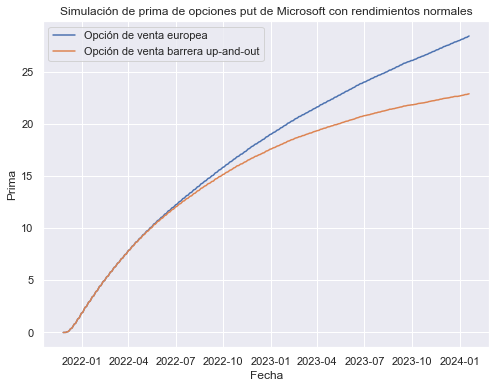

In [30]:
plt.figure(figsize = [8, 6]) # gráfica de simulación con rendimientos normales de put europea y up and out
plt.plot(put, label = "Opción de venta europea")
plt.plot(putuo_norm, label = "Opción de venta barrera up-and-out")
plt.title("Simulación de prima de opciones put de Microsoft con rendimientos normales")
plt.xlabel("Fecha")
plt.ylabel("Prima")
plt.legend(loc = "best")
plt.show()

In [31]:
print("El precio real de la prima del put de Microsot es " + str(opt_valuar["lastPrice"]) + ".") # recordar prima

El precio real de la prima del put de Microsot es 40.0.


**Valuación europea**

In [32]:
put.iloc[-1] # valuación de la prima de put europea en el último día (al cierre del contrato)

Prima europea    28.407491
Name: 2024-01-19 00:00:00, dtype: float64

In [33]:
mean_est = put.iloc[-1]["Prima europea"] 
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del put europeo de Microsoft con el modelo de los rendimientos normales" +
      " es " + str(i) + ".")

El intervalo de confianza de la valuación del put europeo de Microsoft con el modelo de los rendimientos normales es (27.43918059436269, 29.375801165536714).


El intervalo de confianza de la valuación de la prima europea da cerca a la prima real, por lo que la simulación con el modelo de rendimientos normales es confiable.

**Valuación barrera**

In [34]:
putuo_norm.iloc[-1] # valuación de la prima de put barrera en el último día (al cierre del contrato)

Prima up-and-out    22.870378
Name: 2024-01-19 00:00:00, dtype: float64

In [35]:
mean_est = putuo_norm.iloc[-1]["Prima up-and-out"] 
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) 
print("El intervalo de confianza de la valuación del put up-and-out de Microsoft con el modelo de los rendimientos normales" +
      " es " + str(i) + ".")

El intervalo de confianza de la valuación del put up-and-out de Microsoft con el modelo de los rendimientos normales es (21.902068188583566, 23.83868875975759).


El intervalo de confianza de la valuacion barrera esta más alejada que la europea, esto tiene sentido,ya que mientras mas baja sea la barrera, mayor es la probabilidad de que la opción se desactive por lo que el riesgo sería mayor y la prima más barata.

### Simulación con histograma de rendimientos

In [36]:
put_hist = pd.DataFrame({"Prima europea": np.exp(-r * ndays) * np.fmax(strike - sim_closes_hist, 
                                                                       np.zeros([ndays, nscen])).T.mean()}, index = dates)
putuo_hist = pd.DataFrame({"Prima up-and-out": np.exp(-r * ndays) * (I * np.fmax(strike - sim_closes_hist, 
                                                                                 0)).mean(axis = 1)}, index = dates) 

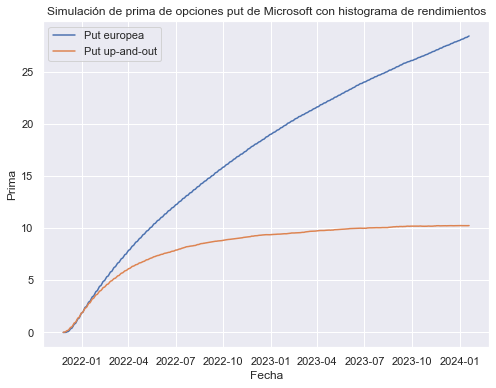

In [37]:
plt.figure(figsize = [8, 6]) # gráfica de simulación de prima del put europea y up and out
plt.plot(put, label = "Put europea")
plt.plot(putuo_hist, label = "Put up-and-out")
plt.title("Simulación de prima de opciones put de Microsoft con histograma de rendimientos")
plt.xlabel("Fecha")
plt.ylabel("Prima")
plt.legend(loc = "best")
plt.show()

**Valuación europea**

In [38]:
put_hist.iloc[-1] # valuación de la prima de put europea en el último día (al cierre del contrato)

Prima europea    27.600771
Name: 2024-01-19 00:00:00, dtype: float64

In [39]:
mean_est = put_hist.iloc[-1]["Prima europea"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del put europeo de Microsoft con el modelo del histograma de los" +
      " rendimientos es " + str(i) + ".")

El intervalo de confianza de la valuación del put europeo de Microsoft con el modelo del histograma de los rendimientos es (26.632461200335097, 28.569081771509122).


El intervalo de confianza de la valuación de la prima europea da cerca a la prima real, por lo que la simulación con el histograma de los rendimientos también es confiable (un poco menos que la valuación con el modelo de rendimientos normales).

**Valuación barrera**

In [40]:
putuo_hist.iloc[-1] # valuación de la prima de put barrera en el último día (al cierre del contrato)

Prima up-and-out    10.239177
Name: 2024-01-19 00:00:00, dtype: float64

In [41]:
mean_est = putuo_hist.iloc[-1]["Prima up-and-out"] # media de la simulación
i = st.norm.interval(confianza, loc = mean_est, scale = sigma_est) # asumir distribución normal
print("El intervalo de confianza de la valuación del put up-and-out de Microsoft con el modelo del histograma de los" +
      " rendimientos es " + str(i) + ".")

El intervalo de confianza de la valuación del put up-and-out de Microsoft con el modelo del histograma de los rendimientos es (9.270866711281297, 11.207487282455318).


La valuación con el histograma de los rendimientos de la put barrera es mucho menor a la valuación real de la opción

SOLUCION CRISTINA